In [1]:
using Plots
using LinearAlgebra
using NLsolve
using Statistics
using NPZ

In [234]:
include("../src/minicluster_evol.jl")

scan_mc_evolution (generic function with 1 method)

In [235]:
fileTail = "PhaseSpace_Map_AxionM_1.0e-6_ThetaM_0.0_rotPulsar_1.0_B0_1.0e14_rNS_NS_velX_0.0007_.npz";
b = 0.0;
M = 1e-10;
rho_amc = 1e6;
v_NS = [0 0 200.0]; # km/s;

fileName = "temp_storage/FinalX_"*fileTail;
finalX = npzread(fileName);
maxT = max_time(finalX, b, M, v_NS);

tlist = [0.0 maxT.* 0.8 maxT]; # seconds;
sve=true;
denfull=scan_mc_evolution(fileTail, b, M, rho_amc, v_NS, tlist,sve=sve);

In [229]:
denfull

2×3 Array{Float64,2}:
 0.0       1.12e6       1.4e6
 0.0  794952.0     251121.0

here

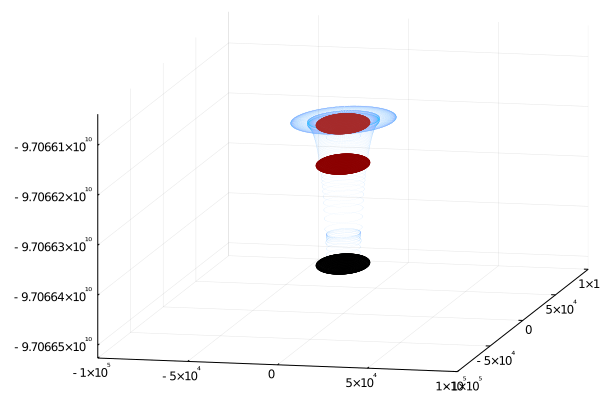

In [198]:
gr(format="png")
fileTail = "PhaseSpace_Map_AxionM_1.0e-6_ThetaM_0.0_rotPulsar_1.0_B0_1.0e14_rNS_NS_velX_0.0007_.npz"
fileName = "temp_storage/FinalX_"*fileTail
finalX = npzread(fileName)
b = 0.0
M = 1e-21
rho_amc = 1e6
v_NS = [0 0 200.0] # km/s

n=4
bb = 0;
phi = 0:pi/50:2*pi;
theta = 0:pi/100:pi;
MM = 1e-22
ics = find_init_conds(finalX, bb, MM, [0 0 200])
R_amc = 1.4e8 .* (MM / 1e-10) .^ (1.0 ./ 3.0) # km
x = R_amc .* [cos(t)*sin(p) for t in theta, p in phi] .- bb;
y =  R_amc  .*  [sin(t)*sin(p) for t in theta, p in phi];
z =  R_amc  .* [cos(p) for t in theta, p in phi] .- ics[3];


maxT = max_time(finalX, b, M, v_NS)

medianZ = Statistics.median(finalX[:, 3])
maxZ = maximum(finalX[:, 3])
minZ = minimum(finalX[:, 3])
dist = 1e5
surface()
scatter!(finalX[:,1], finalX[:,2], finalX[:,3], markersize=1,markeralpha=0.01, zlims=(medianZ*1.000004, medianZ + 1*dist), xlims=(-dist, dist),ylims=(-dist, dist), legend=false)
surface!(camera=(20,40))
plot!(x,y,z, legend=false, color=:black)
plot!(x,y,z .+ 200 .* 1e3, legend=false, color=:darkred)
plot!(x,y,z .+ 200 .* maxT, legend=false, color=:brown)